In [2]:
%cd C:\Users\programing\dataset\社会人のためのデータサイエンス演習

C:\Users\programing\dataset\社会人のためのデータサイエンス演習


In [10]:
import numpy as np
import pandas as pd

# データの確認（データ数、欠損値の有無、データ型）
df = pd.read_csv('dummydata_A.csv', encoding='shift_jis')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
DATA_ID           1000 non-null object
3大都市圏か否か          1000 non-null object
世帯人員              1000 non-null object
就業人員              1000 non-null object
住宅の所有関係           1000 non-null object
就業・非就業の別          1000 non-null object
年齢階級（5歳階級）        1000 non-null object
年齢階級（65歳未満か否か）    1000 non-null object
集計用乗率             1000 non-null float64
年間収入(円)           1000 non-null int64
消費支出額（合計）         1000 non-null int64
食費                1000 non-null int64
住居費               1000 non-null int64
光熱・水道費            1000 non-null int64
家具・家事用品費          1000 non-null int64
被服及び履物費           1000 non-null int64
保健医療費             1000 non-null int64
交通・通信費            1000 non-null int64
教育費               1000 non-null int64
教養娯楽費             1000 non-null int64
その他の消費支出          1000 non-null int64
dtypes: float64(1), int64(12), object(8)
memory usage: 164.1+ KB


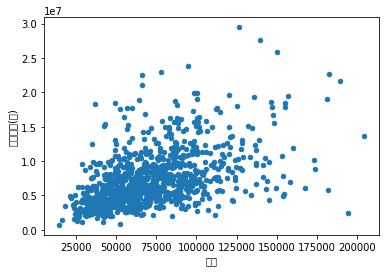

In [25]:
#　問題4-3
#　回帰分析による予測モデルを作成
import matplotlib
# 目的変数を「食費」、説明変数を「年間収入（円）」とした散布図
df.plot(kind='scatter', x= '食費', y='年間収入(円)')

In [29]:
rm fontlist-v300.json
rm -r tex.cache

SyntaxError: invalid syntax (<ipython-input-29-b3228d57baec>, line 1)

Text(0, 0.5, 'Education cost.')

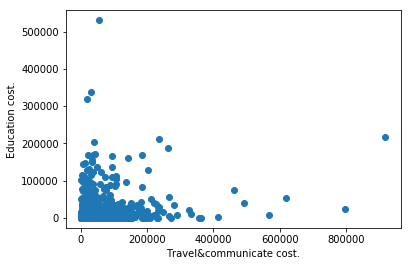

In [4]:
#　問題3-3
#　交通・通信費と教育費の散布図

import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(x= df_A['交通・通信費'],
            y= df_A['教育費'])
plt.xlabel('Travel&communicate cost.')
plt.ylabel('Education cost.')

In [5]:
#　問題3-5
#　相関関係を算出

corr_list = ['年間収入(円)', '住居費', '家具・家事用品費', '教養娯楽費']
df_A[corr_list].corr()

,年間収入(円),住居費,家具・家事用品費,教養娯楽費
年間収入(円),1.000000,-0.190513,0.117808,0.273181
住居費,-0.190513,1.000000,-0.071049,-0.073598
家具・家事用品費,0.117808,-0.071049,1.000000,0.105270
教養娯楽費,0.273181,-0.073598,0.105270,1.000000


In [22]:
#　問題3-6  
#　データの確認
df_B = pd.read_csv('dummydata_B.csv', encoding='shift_jis', index_col= 0)
df_B['６０パック旅行費（外国）'].head()

年月
平成18年1月    2,064
平成18年2月    2,221
平成18年3月    2,784
平成18年4月    3,079
平成18年5月    2,644
Name: ６０パック旅行費（外国）, dtype: object

In [46]:
# 「パック旅行費（外国）」のデータ型がobjectだった
#　1. カンマがobject型になった原因のため、str.replace()で取り除いて、整数型に変換
#　2. 行名を時系列表示に変換

df_B_travel= df_B['６０パック旅行費（外国）'].str.replace(',', '').astype(np.int64)
df_B_travel.index = pd.date_range(start='2006-1', periods=108, freq='M')
df_B_travel.head()

2006-01-31    2064
2006-02-28    2221
2006-03-31    2784
2006-04-30    3079
2006-05-31    2644
Freq: M, Name: ６０パック旅行費（外国）, dtype: int64

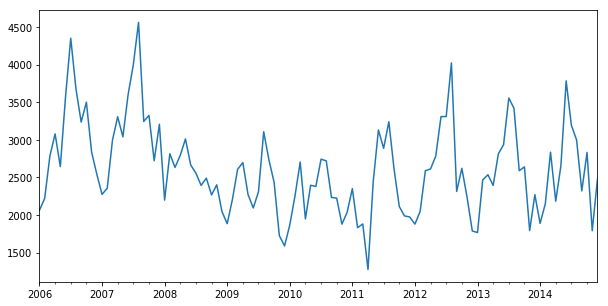

In [70]:
# 実測データのplot
df_B_travel.plot(figsize=(10, 5))

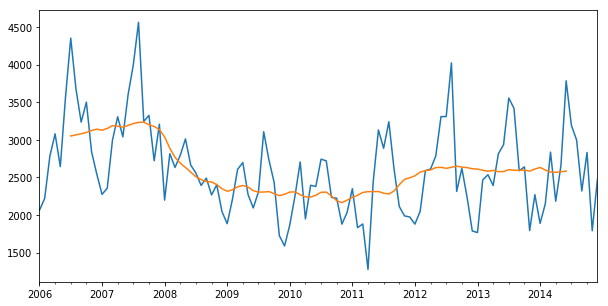

In [88]:
# 実測データと、季節影響を排除した"trendを"plot

import statsmodels.api as sm
res = sm.tsa.seasonal_decompose(df_B_travel)

res.observed.plot(figsize=(10, 5))
res.trend.plot()